In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ETL.TemporalOrderETL import TemporalOrderETL

In [3]:
etl = TemporalOrderETL.load(
    orderbook_path="optiver-realized-volatility-prediction/book_train.parquet/*",
    train_path='optiver-realized-volatility-prediction/train.csv'
)

### Denormalize Prices

In [4]:
df_prices_denorm = etl.denormalized_prices
df_prices_denorm

Denormalizing prices:   0%|          | 0/112 [00:00<?, ?file/s]/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/econometrics/realized-vol/ETL/utils.py:178: RuntimeWarning: All-NaN axis encountered
  min_diff = np.nanmin(diff.where(lambda x: x > 0))
/Users/rikygirg/eco

stock_id,0,1,2,3,4,5,6,7,8,9,...,115,116,118,119,120,122,123,124,125,126
time_id,,,,,,,,,,,,,,,,,,,,,
5,193.382492,152.416321,123.461426,226.012222,619.198914,738.256592,370.275787,245.870972,283.881409,238.394791,...,88.143524,246.326035,210.790482,66.225349,96.217049,142.352631,108.310135,84.344765,53.375172,310.446014
11,199.230484,149.512009,128.641220,249.893173,614.775574,769.481140,411.690094,256.711212,278.116791,244.391083,...,90.285606,275.919983,213.987640,63.064598,101.239487,136.924683,105.482063,91.095215,55.886795,300.948120
16,208.900101,104.885666,118.687622,164.755249,534.006470,584.016541,236.595123,208.127701,123.656639,177.405899,...,70.035149,189.724258,281.007935,53.520546,74.554428,93.370636,77.421021,55.054432,53.084003,194.495605
31,216.138260,137.831207,138.326843,235.951401,657.637024,804.561646,358.949341,260.607147,194.206650,232.626587,...,90.688217,256.869873,235.129517,61.245171,90.928452,134.847290,103.739265,92.465027,58.124481,259.149048
62,214.516327,140.650238,137.213394,238.242508,639.647217,765.430359,403.068359,250.621872,187.756607,243.459991,...,89.140907,248.061737,231.193771,59.542957,87.940269,125.482864,103.529648,96.060417,57.373158,259.214203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32751,192.207764,148.865372,132.110580,243.722214,652.082458,745.338501,389.702423,252.020432,252.114136,230.046722,...,88.523949,269.021423,241.987518,60.049755,93.429985,135.630814,103.531319,94.184822,56.814400,306.255493
32753,199.748993,143.562744,128.829956,245.019730,616.837402,755.527649,389.036255,249.891006,258.463165,241.465759,...,91.186058,269.457855,212.935867,62.066113,92.794334,136.533142,104.054977,87.874306,55.995628,290.136261
32758,198.471329,111.979019,142.683929,216.825653,591.479675,729.433289,509.977234,234.174942,132.590469,206.086533,...,80.310356,225.500214,211.873459,43.955593,80.582207,111.225449,89.826469,81.064095,56.597614,202.570511


Comparison with real prices, the YahooFinance api sucks. I'd suggesting saving the Amazon prices once and loading it

In [5]:
SP100_tickers = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2].Symbol
df_prices_real = yf.download(SP100_tickers.to_list(), start='2020-01-01', end='2021-06-01', interval='1d')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

### Can we recover time_id order from denormalized prices?

*I found this task an intersting exercise alongside with the main competition goal, I worked on it when I was stuck with other normal ideas.*

We can treat each time_id row as a point in a 112 dimensional space, where temporally close time_ids should be close in that space. Ideally, there should be a continuous 1d manifold/curve. So lets try different dimensionality reduction methods on both denormalized and real prices for comparison.

In [ ]:
from sklearn.preprocessing import minmax_scale

df_prices_denorm_scaled = df_prices_denorm.fillna(df_prices_denorm.mean())
df_prices_denorm_scaled = pd.DataFrame(minmax_scale(df_prices_denorm_scaled), index=df_prices_denorm.index)

In [ ]:
from sklearn.decomposition import PCA
from ETL.TemporalOrderETL import plot_emb

### Principal Component Analysis (PCA) Embedding


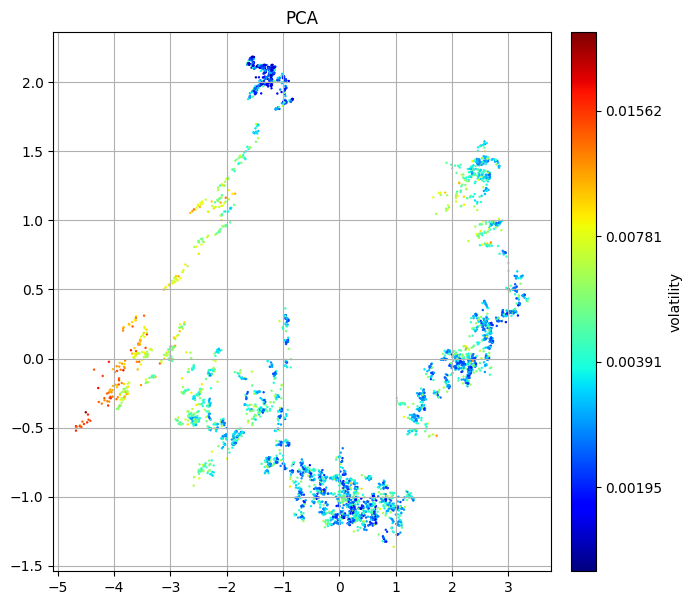

In [ ]:
emb = PCA(n_components=2)
emb_denorm = emb.fit_transform(df_prices_denorm_scaled)
plot_emb(emb_denorm, etl.df_volatility_train, 'PCA', 'volatility')

In [ ]:
from sklearn.manifold import TSNE

### t-SNE Embedding
This cell uses t-SNE to project the scaled denormalized price data into two dimensions, helping to reveal the structure and clusters associated with different levels of realized volatility.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3830 samples in 0.001s...
[t-SNE] Computed neighbors for 3830 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3830
[t-SNE] Computed conditional probabilities for sample 2000 / 3830
[t-SNE] Computed conditional probabilities for sample 3000 / 3830
[t-SNE] Computed conditional probabilities for sample 3830 / 3830
[t-SNE] Mean sigma: 0.232494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.942867
[t-SNE] KL divergence after 2000 iterations: 0.152142


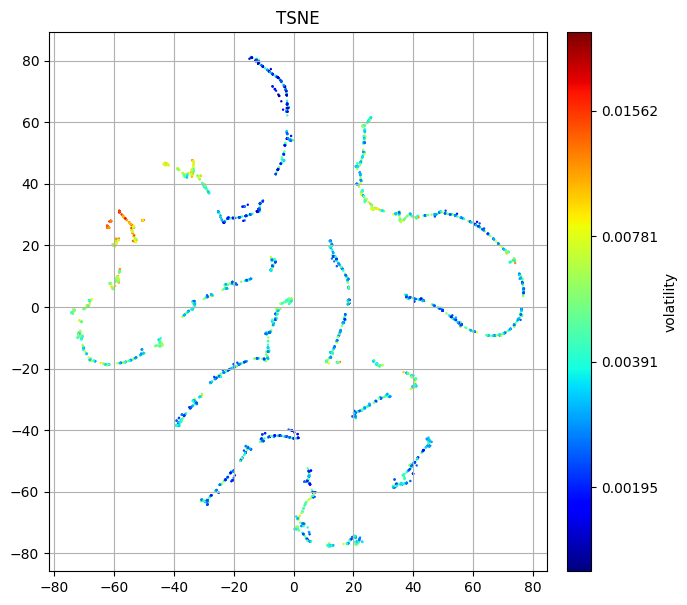

In [ ]:
emb = TSNE(n_components=2, perplexity=40, learning_rate=50, 
           verbose=1, init='pca', n_iter=2000,
           early_exaggeration=12)
emb_denorm = emb.fit_transform(df_prices_denorm_scaled)
plot_emb(emb_denorm, etl.df_volatility_train, 'TSNE', 'volatility')

In [ ]:
from sklearn.manifold import SpectralEmbedding

### Spectral Embedding
This cell computes a spectral embedding of the scaled denormalized price data to uncover nonlinear manifold structure linked to volatility, and then visualizes the result. Uncomment the lines for `emb_real` and its `plot_emb` call to compare with real market prices.

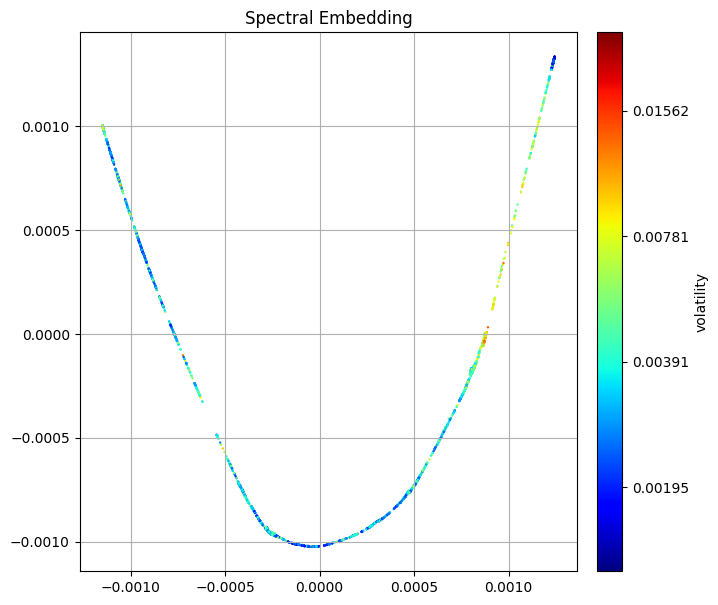

In [ ]:
emb = SpectralEmbedding(random_state=2)
emb_denorm = emb.fit_transform(df_prices_denorm_scaled)
# emb_real = emb.fit_transform(df_prices_real_scaled)
plot_emb(emb_denorm, etl.df_volatility_train, 'Spectral Embedding', 'volatility')
# plot_emb(emb_real, df_volatility_real, 'real prices', 'volatility', f, ax[1])

Well, there a few interesting insights from the plots above:
1. There are definetely a lot of similarities between embeddings of denorm prices vs real prices - both shapes and colors. This can confirm that price denormalization works correctly.
2. We indeed see long continuous segments as it was expected.
3. There is a single outstanding cluster of high volatility, and as we know that real data includes period of [2020 stock market crash](https://en.wikipedia.org/wiki/2020_stock_market_crash) we can pretty confidently assume that this is the same cluster in training data.
4. Spectral embeddings look very nice - there is single connected line and we can easily order all points from left to right.

Cool! We can see, that spectral embedding indeed sorts all points by date. So we now can use X-coordinate of embeddings to approximately recover time order of time_ids in training data.

In [ ]:
df_prices_denorm_ordered = df_prices_denorm.iloc[np.argsort(-emb_denorm[:, 0])]

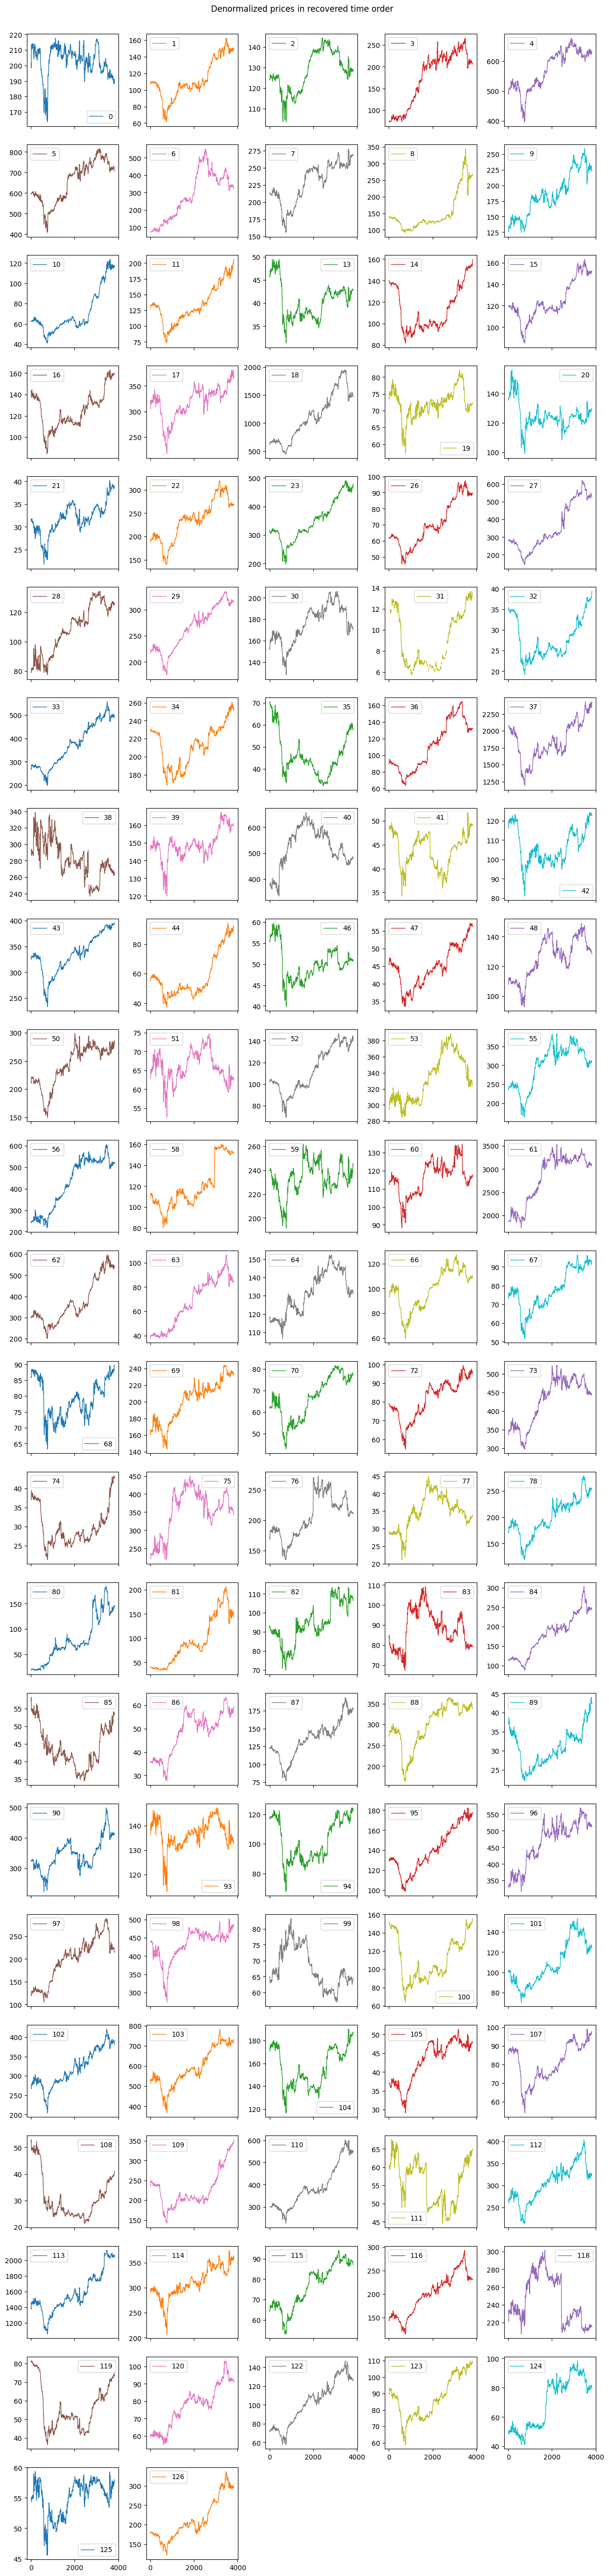

In [ ]:
df_prices_denorm_ordered.reset_index(drop=True).rolling(10).mean(). \
    plot(subplots=True, layout=(-1, 5), figsize=(15, 60), sharex=True, lw=1)
plt.suptitle('Denormalized prices in recovered time order')
plt.subplots_adjust(top=0.97, wspace=0.3)

Looks pretty reasonable - you can easily spot 2020 coronavirus crash with following upwards trend on many plots. 

Let's look at real prices for comparison:

We must mutiply AMZN by 20 because it did a 20x1 stock split in July 2022

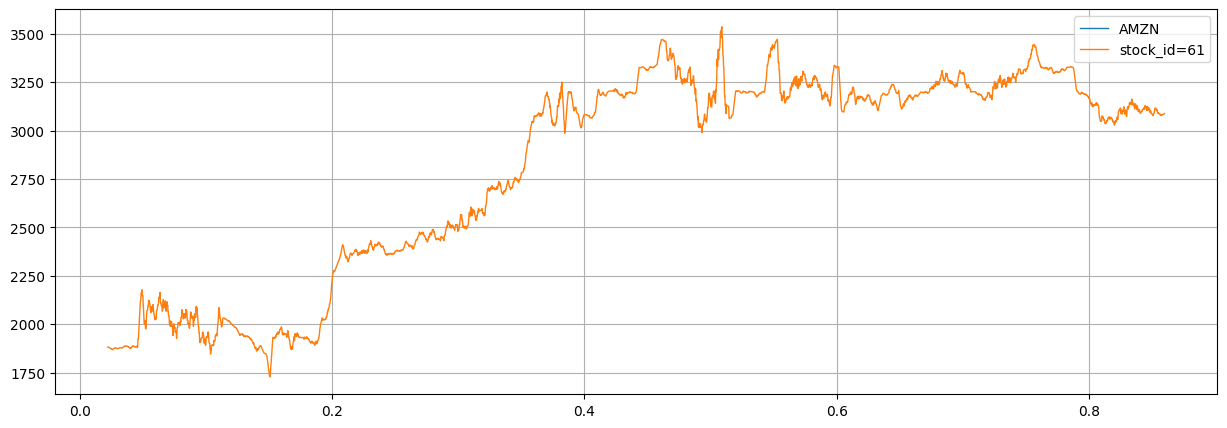

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 5))
#df_prices_real['AMZN'].sort_index().to_frame().set_index(np.linspace(0, 1, len(df_prices_real))).plot(lw=1, ax=ax)
stockAMZN_1 = df_prices_denorm_ordered[61].rolling(10).mean().to_frame().set_index(np.linspace(0.02, 0.86, len(df_prices_denorm_ordered))).values
stockAMZN = df_prices_real[('Close','AMZN')].values

plt.plot(np.linspace(0,1,len(stockAMZN)), 20*stockAMZN, lw=1, label='AMZN')
plt.plot(np.linspace(0.02, 0.86, len(stockAMZN_1)), stockAMZN_1, lw=1, label='stock_id=61')
plt.legend()
plt.grid()

### Can we utilize this additional information to improve our model score?

I can't say I found the best way to utilize it with maximum gain, considering that this time ordering method while recovering global order might be quite noisy locally. But one simple idea could be to feed into our model features from nearest time_ids besides current one.

Let's try it with the most basic linear model with one feature: current realized volatility.

In [ ]:
df_rv_train = etl.df_rv_train

Now we'll train a few models varying number of neighours we provide as input to select an optimal number based on CV.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from ETL.utils import rmspe

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import make_scorer

In [ ]:
nn = NearestNeighbors(algorithm='brute')
nn.fit(df_prices_denorm_scaled)
nn_ind = nn.kneighbors(df_prices_denorm_scaled, n_neighbors=10, return_distance=False)

### Cross-Validation Experiment

- A 5-fold GroupKFold CV was run on linear regression models using realized volatility features from the current time_id and its nearest neighbors (nn_count from 1 to 10), with sample weights = 1/target².
- Increasing nn_count from 1 to 6 steadily lowers the average RMSPE from ≈ 0.27 to ≈ 0.23.
- Beyond nn_count = 6, the CV score plateaus, indicating diminishing returns.
- Conclusion: incorporating up to six local temporal neighbors improves realized volatility prediction, but adding more neighbors yields little additional benefit.


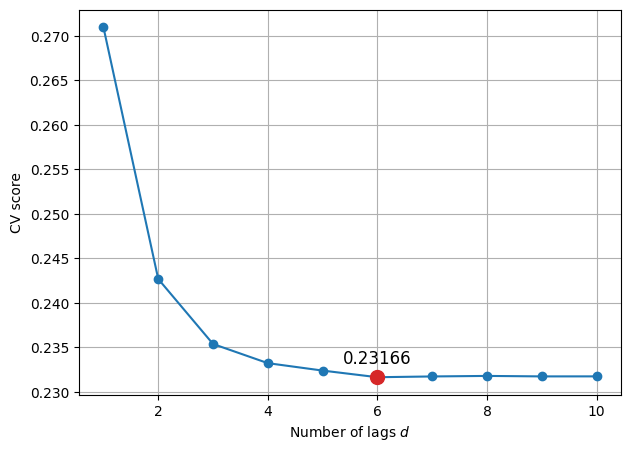

In [ ]:
gkf = GroupKFold(n_splits=5)
sample_weights = 1 / etl.train.target**2

results = []

for nn_count in range(1, 11):
    time_ind = etl.train.time_id.factorize()[0]
    stock_ind = etl.train.stock_id.factorize()[0]
    df_train = df_rv_train.pivot(index='time_id', columns='stock_id', values='rv')
    
    # advanced indexing to gather nearest rv
    df_train = pd.DataFrame(df_train.values[
            nn_ind[time_ind, :nn_count],
            stock_ind[:, None]], 
        index=etl.train.index)
    df_train.rename(lambda x: f'rv_{x}', axis=1, inplace=True)
    df_train.fillna(df_train.mean(), inplace=True)
    
    scores = []
    for train_idx, test_idx in gkf.split(df_train, groups=etl.train.time_id):
        X_train, X_test = df_train.iloc[train_idx], df_train.iloc[test_idx]
        y_train, y_test = etl.train.target.iloc[train_idx], etl.train.target.iloc[test_idx]
        sw_train = sample_weights.iloc[train_idx]

        model = LinearRegression()
        model.fit(X_train, y_train, sample_weight=sw_train)
        #model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(rmspe(y_test, y_pred))
    
    results.append({'nn_count': nn_count, 'score': np.mean(scores)})

df_results = pd.DataFrame(results)
ax = df_results.plot(x='nn_count', y='score', style='-C0o', figsize=(7, 5), legend=False)
best = df_results.iloc[df_results.score.argmin()]
plt.plot(best.nn_count, best.score, 'C3o', markersize=10)
plt.annotate(f'{best.score:.5f}', xy=(best.nn_count, best.score), xytext=(0, 10), 
             fontsize=12, textcoords='offset points', ha='center')
plt.ylabel('CV score')
plt.xlabel("Number of lags $d$")
plt.grid()

In the plot above nn_count=1 effectively means we use only one feature - current realized volatility as input, and you can see that providing realized volatility from neighbour time_ids greatly improves the score from *0.27* to *0.23*, and it plateaus after nn_count > 6.

Finally let's train model using optimal nn_count=6 and use it for predicting on test.

Text(0.5, 1.0, 'Feature weights')

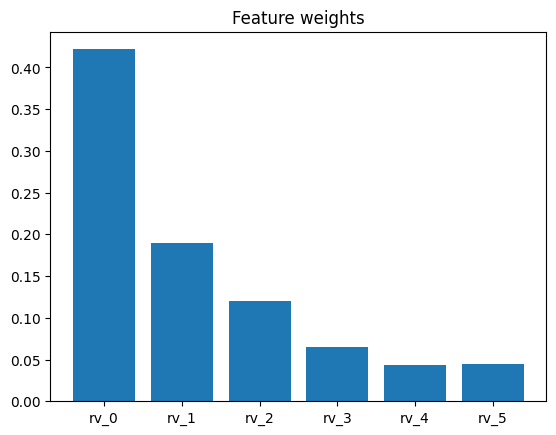

In [ ]:
nn_count = 6

time_ind = etl.train.time_id.factorize()[0]
stock_ind = etl.train.stock_id.factorize()[0]
df_train = df_rv_train.pivot(index='time_id', columns='stock_id', values='rv')

df_train = pd.DataFrame(df_train.values[
        nn_ind[time_ind, :nn_count],
        stock_ind[:, None]], 
    index=etl.train.index)
df_train.rename(lambda x: f'rv_{x}', axis=1, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)

model = LinearRegression()
model.fit(df_train, etl.train.target, sample_weight=1 / etl.train.target ** 2)

plt.bar(x=df_train.columns, height=model.coef_)
plt.title('Feature weights')